<a href="https://colab.research.google.com/github/hack2050/hack2050/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erro Quadrático Médio (MSE): 0.4540354067290411
Erro Médio Absoluto (MAE): 0.4874904991291027
Coeficiente de Determinação (R²): 0.6535162576964783


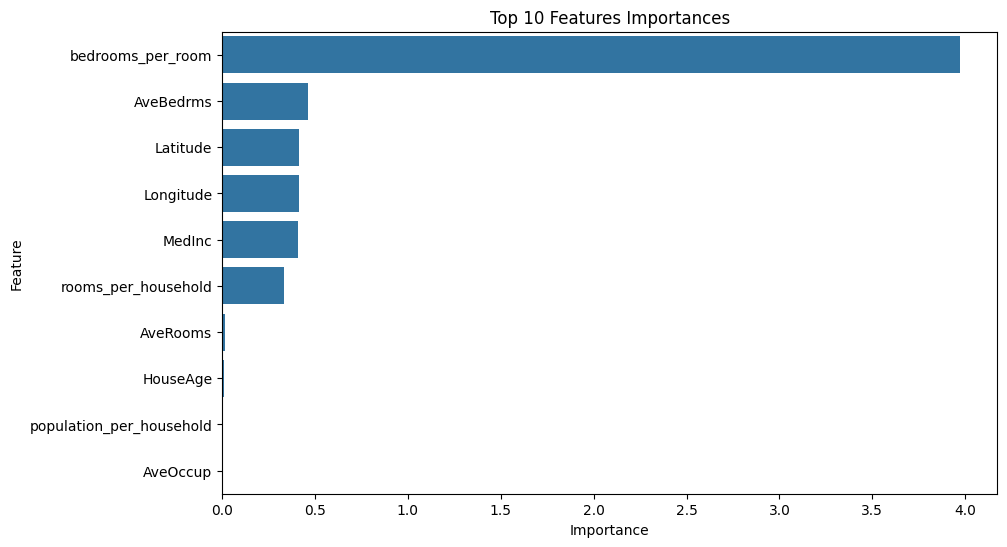

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o conjunto de dados California Housing
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
target = pd.DataFrame(housing.target, columns=['MEDV'])

# Engenharia de Recursos
data['rooms_per_household'] = data['AveRooms'] / data['AveOccup']
data['population_per_household'] = data['Population'] / data['AveOccup']
data['bedrooms_per_room'] = data['AveBedrms'] / data['AveRooms']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

#  Tuning
param_grid = {'alpha': [0.1, 1, 10]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

#  modelo Ridge
model = Ridge(alpha=best_params['alpha'])
model.fit(X_train, y_train)

# previsões
y_pred = model.predict(X_test)

# desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Erro Quadrático Médio (MSE):", mse)
print("Erro Médio Absoluto (MAE):", mae)
print("Coeficiente de Determinação (R²):", r2)

#  Recursos
feature_importances = pd.Series(model.coef_[0], index=X_train.columns)
sorted_importances = feature_importances.abs().sort_values(ascending=False)
top_features = sorted_importances.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Features Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
